# Data Screening
**Customer Data Analysis**
A data exploration project to understand customer characteristics and behavior.

## Introduction
This notebook will guide you through the standard steps of data analysis, starting from data loading, cleaning, initial exploration, to visualization

In [115]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import cprint

sns.set_style("whitegrid")

#### Data Loading and Overview:
Load the customer dataset and see the first overview.

In [116]:
data = pd.read_csv('data/data_nasabah.csv', delimiter=';') # Load the dataset

# Overview
print("Dimensi data (Baris, Kolom)")
print(data.shape) # Display the shape of the DataFrame (rows, columns)

cprint("\nInformation data types and encoding", "blue")  # Display data types and encoding scheme
print(data.info())

print("5 Baris pertama dari DataFrame:")
data.head()  # Display the first few rows of the DataFrame



Dimensi data (Baris, Kolom)
(100, 10)

Information data types and encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nasabah_id                 100 non-null    object
 1   umur                       100 non-null    int64 
 2   jenis_kelamin              100 non-null    object
 3   pendapatan                 100 non-null    int64 
 4   saldo_rata_rata            100 non-null    int64 
 5   jumlah_transaksi           100 non-null    int64 
 6   jenis_produk               100 non-null    object
 7   frekuensi_kunjungi_cabang  100 non-null    int64 
 8   pengguna_mobile_banking    100 non-null    object
 9   skor_kredit                100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB
None
5 Baris pertama dari DataFrame:


,nasabah_id,umur,jenis_kelamin,pendapatan,saldo_rata_rata,jumlah_transaksi,jenis_produk,frekuensi_kunjungi_cabang,pengguna_mobile_banking,skor_kredit
0,N001,22,Perempuan,5800000,1508000,19,tabungan,1,TIDAK,900
1,N002,64,Perempuan,5700000,1254000,9,kartu_kredit,2,TIDAK,900
2,N003,27,Perempuan,2950000,590000,12,tabungan,1,YA,500
3,N004,34,Perempuan,3100000,186000,16,deposito,5,TIDAK,700
4,N005,45,Laki-Laki,6700000,1474000,15,kartu_kredit,3,YA,800


#### Validation of Data Quality:
Ensure there are consistency, missing values and data duplication.

In [117]:
# 1. Check data for consistency
# - Check whether the values in a given column conform to the expected limits.
# - Example: Check if the 'umur' column contains only positive values.
if data['umur'].min() < 0:
    cprint('Kolom "umur" mengandung nilai negatif. Periksa data untuk konsistensi.', "red")
else:
    cprint('Kolom umur valid, tidak ada nilai negatif.', 'green')

# 2. Analysis missing values
cprint("\nAnalisis Nilai yang Hilang:", "blue")
missing_values = data.isnull().sum()
print("Jumlah nilai yang hilang untuk setiap kolom:")
print(missing_values)

# 3. Detect and handle duplicate data
# - Check for duplicate data rows and delete them if necessary.
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    cprint(f"Terdapat {duplicate_rows} baris duplikat. Menghapus duplikat...", "yellow")
    data.drop_duplicates(inplace=True) # Remove duplicate rows
else:
    cprint("Tidak ada baris duplikat.", "green")

# 3. Data range validation
# - Check whether the values in a particular column are within a reasonable range.
# - Example: Check if the 'saldo_rata_rata' column has realistic values.
print("\nValidasi Rentang Saldo Rata-Rata:")
if data['saldo_rata_rata'].max() > 1972000: # Assuming 1972000 is a reasonable upper limit
    cprint('Kolom "saldo_rata_rata" mengandung nilai yang tidak realistis. Periksa data.', "red")
else:
    cprint("Nilai saldo rata-rata dalam rentang yang wajar.", "green")


Kolom umur valid, tidak ada nilai negatif.

Analisis Nilai yang Hilang:
Jumlah nilai yang hilang untuk setiap kolom:
nasabah_id                   0
umur                         0
jenis_kelamin                0
pendapatan                   0
saldo_rata_rata              0
jumlah_transaksi             0
jenis_produk                 0
frekuensi_kunjungi_cabang    0
pengguna_mobile_banking      0
skor_kredit                  0
dtype: int64
Tidak ada baris duplikat.

Validasi Rentang Saldo Rata-Rata:
Nilai saldo rata-rata dalam rentang yang wajar.


#### Exploratory Data Analysis (EDA) - Univariate Analysis:
Understand the distribution of each **variable individually**.
- **IMPORTANT:** Categorical visualization is performed BEFORE encoding so that the original labels are visible.

In [118]:
# Display basic statistics and unique values for each column
cprint("Statistik Deskriptif untuk Data Numerik:", "blue")
print(data.describe()) # Display descriptive statistics for numerical columns

# Unique values for each column
cprint("\nJumlah Nilai Unik untuk Setiap Kolom:", "blue")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")


Statistik Deskriptif untuk Data Numerik:
             umur    pendapatan  saldo_rata_rata  jumlah_transaksi  \
count  100.000000  1.000000e+02     1.000000e+02         100.00000   
mean    43.380000  4.555500e+06     8.159000e+05          12.78000   
std     13.232788  1.587004e+06     4.634987e+05           6.72036   
min     20.000000  2.800000e+06     1.475000e+05           2.00000   
25%     32.000000  3.100000e+06     4.485000e+05           7.75000   
50%     45.000000  3.475000e+06     7.652500e+05          13.00000   
75%     54.250000  6.225000e+06     1.050000e+06          18.25000   
max     64.000000  7.000000e+06     1.972000e+06          25.00000   

       frekuensi_kunjungi_cabang  skor_kredit  
count                 100.000000   100.000000  
mean                    2.700000   698.000000  
std                     1.494096   149.057646  
min                     1.000000   500.000000  
25%                     1.000000   600.000000  
50%                     3.000000   700.0


Analisis Distribusi Data Numerik:


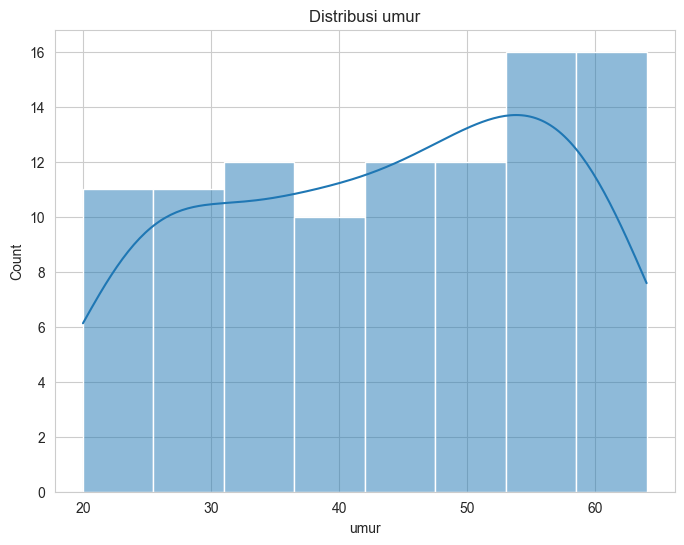

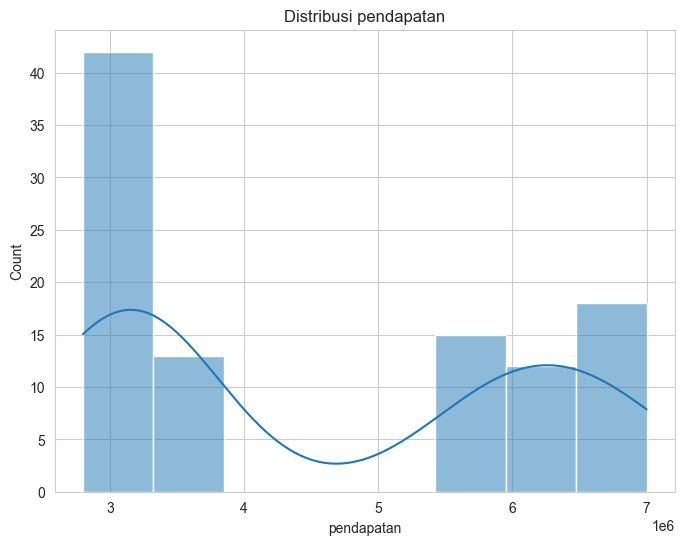

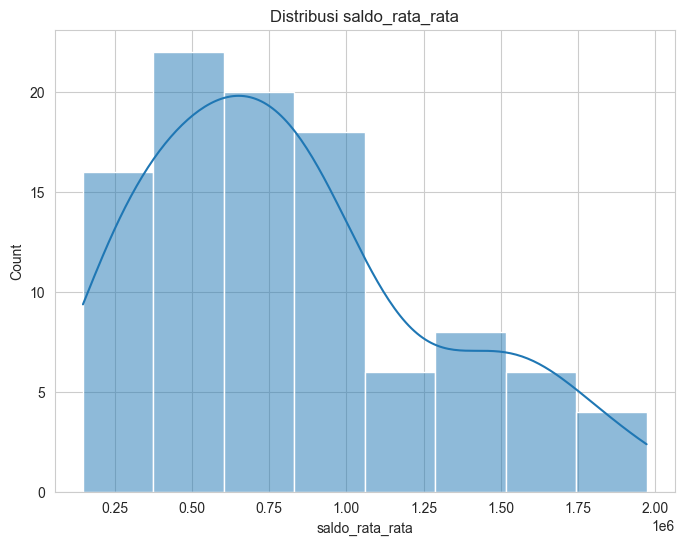

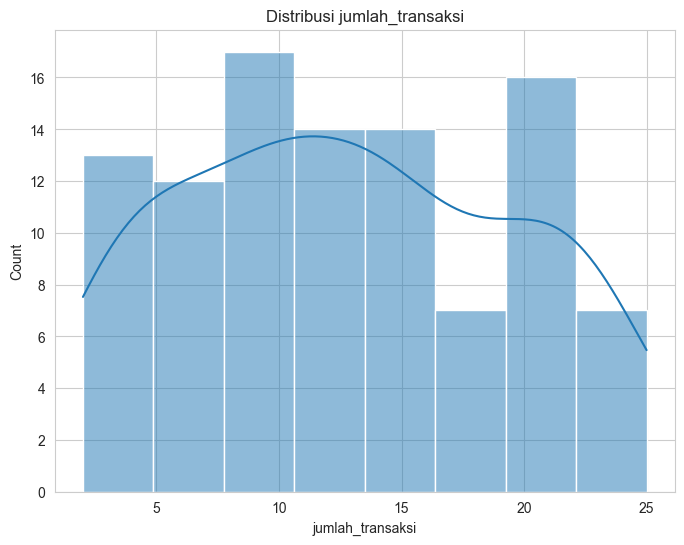

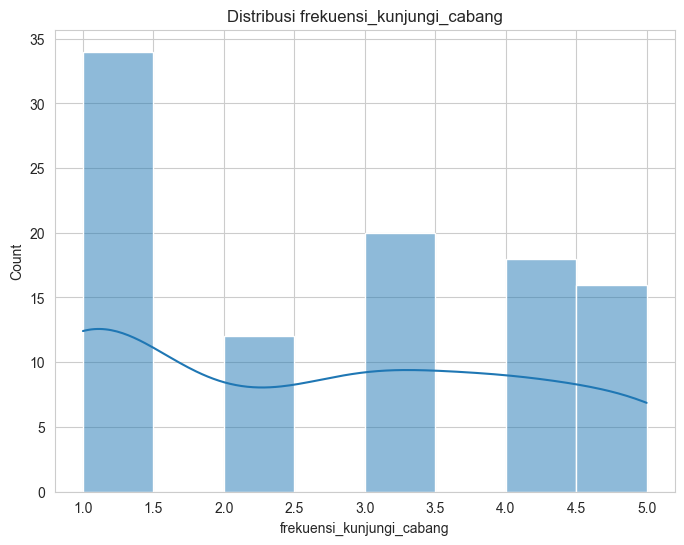

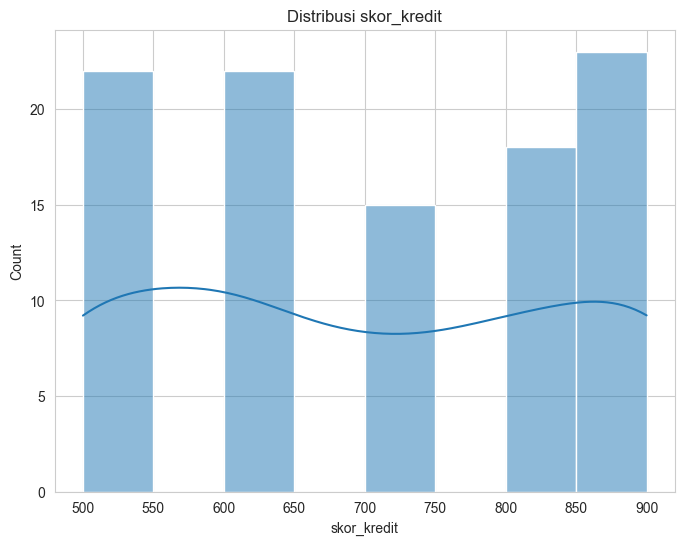


Analisis Outlier:


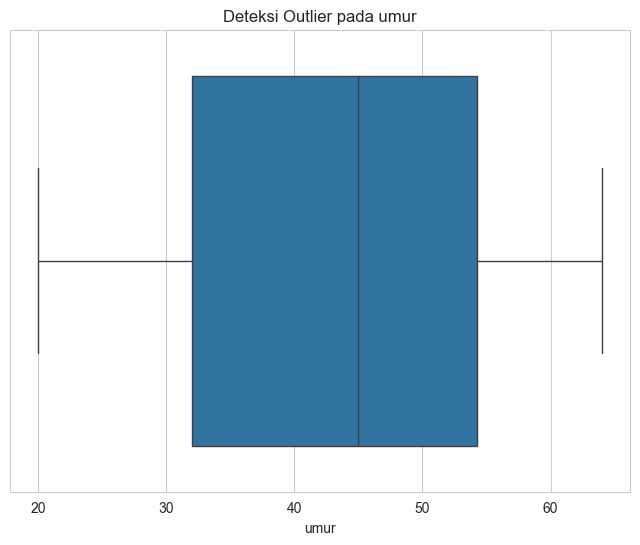

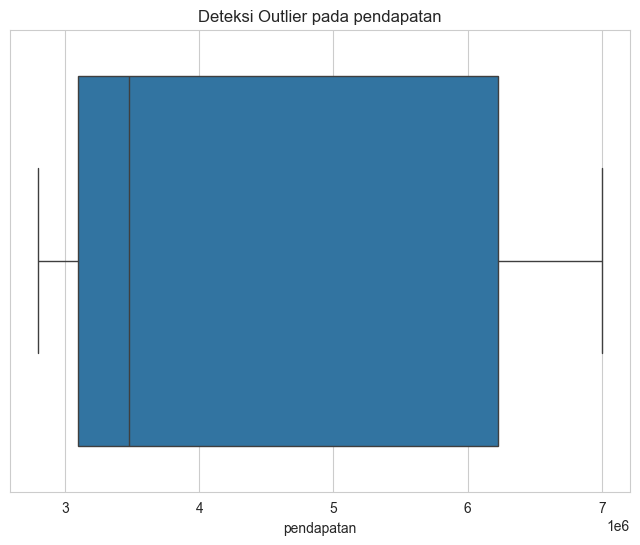

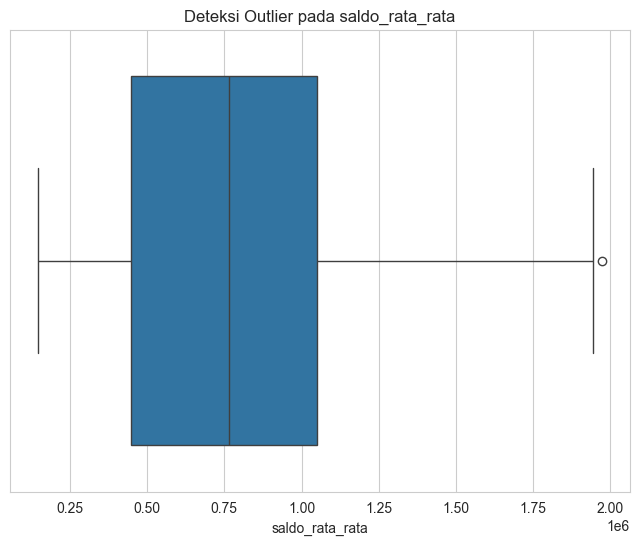

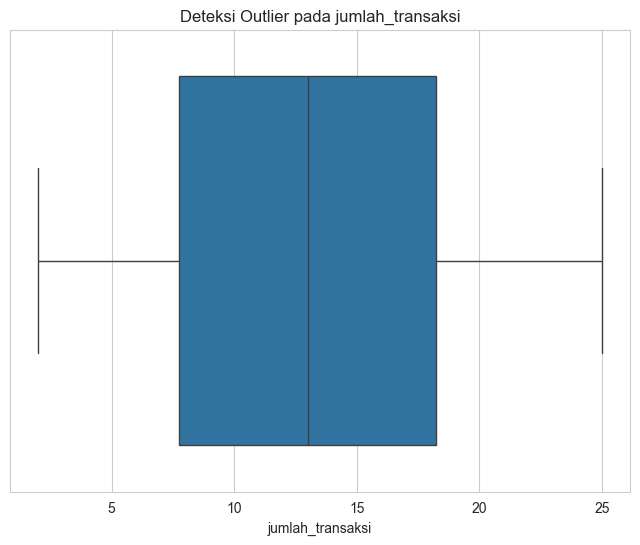

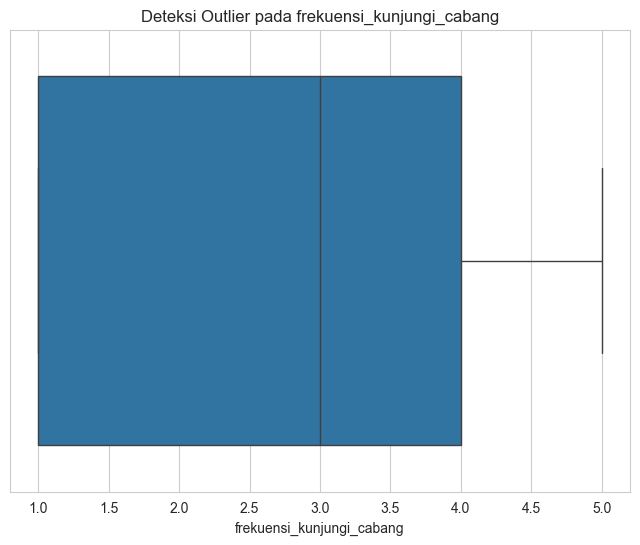

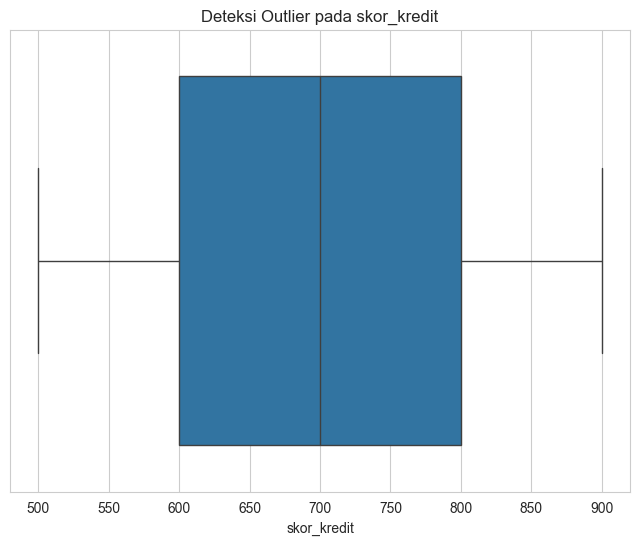

In [119]:
# Visualization of Numeric Data Distribution (Histogram & Boxplot)
cprint('\nAnalisis Distribusi Data Numerik:', 'blue')
numerical_features = data.select_dtypes(include=['int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True) # Histogram with Kernel Density Estimate
    plt.title(f"Distribusi {feature}")
    plt.show()

# Analysis outliers
cprint('\nAnalisis Outlier:', 'blue')
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature]) # Boxplot to visualize outliers
    plt.title(f"Deteksi Outlier pada {feature}")
    plt.show()


Visualisasi Distribusi Data Kategorikal (sebelum encoding):


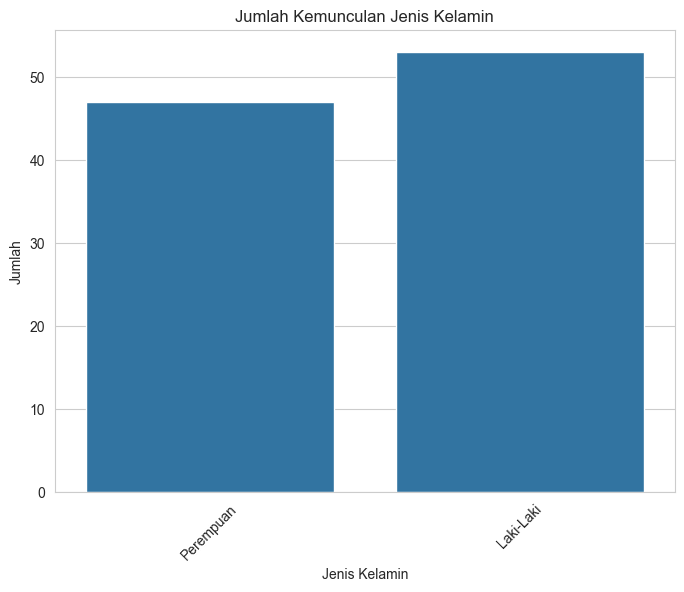

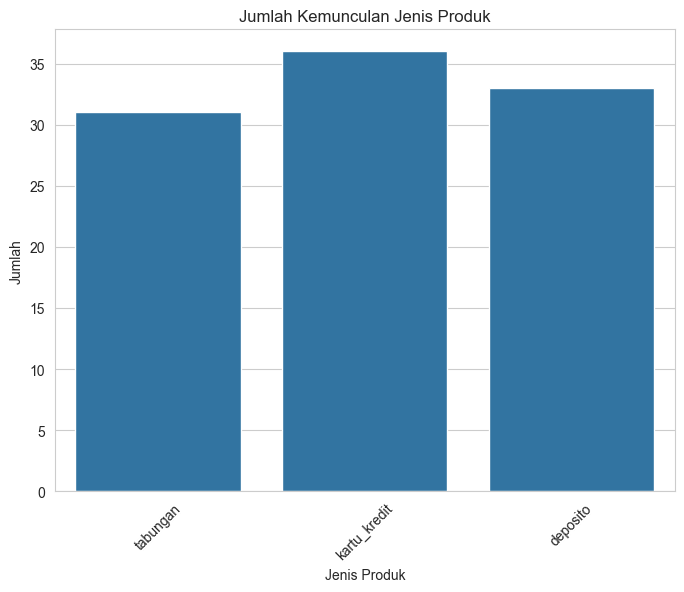

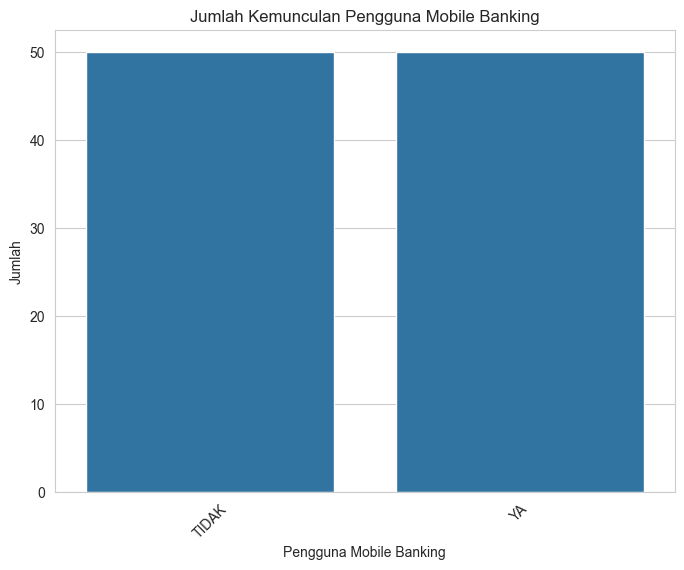

In [120]:
# Visualization of Categorical Data Distribution (Countplot) - BEFORE ENCODING
# Menggunakan kolom asli untuk visualisasi agar label lebih mudah dipahami.
# Kita ambil kolom kategori yang belum di-encode (yaitu yang masih 'object' type)

categorical_features_for_plot = ['jenis_kelamin', 'jenis_produk', 'pengguna_mobile_banking']

print("\nVisualisasi Distribusi Data Kategorikal (sebelum encoding):")
for feature in categorical_features_for_plot:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Jumlah Kemunculan {feature.replace('_', ' ').title()}")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    # plt.savefig(f'images/countplot_{feature}.png')  # Save the plot as an image
    plt.show()


#### Categorical Data Encoding
- Converting categorical variables to numeric for further modeling.
- **Note:** the difference between Label Encoding and One-Hot Encoding.

In [121]:
# Encoding untuk Kolom Kategorikal Biner (Label Encoding)
# 'jenis_kelamin' dan 'pengguna_mobile_banking' adalah biner, jadi Label Encoding cukup.
# Direkomendasikan 0 dan 1.
data['jenis_kelamin_encoded'] = data['jenis_kelamin'].map({'Laki-Laki': 0, 'Perempuan': 1})
data['pengguna_mobile_banking_encoded'] = data['pengguna_mobile_banking'].map({'YA': 1, 'TIDAK': 0})

# Encoding untuk Kolom Kategorikal Nominal (>2 Kategori) - One-Hot Encoding
# 'jenis_produk' adalah nominal dengan lebih dari 2 kategori, One-Hot Encoding lebih tepat.
data = pd.get_dummies(data, columns=['jenis_produk'], prefix='produk', dtype='int')

# Menghapus kolom asli yang sudah di-encode jika tidak lagi diperlukan
data = data.drop(columns=['jenis_kelamin', 'pengguna_mobile_banking'])

print("\nData setelah Encoding:")
data.head()  # Display the first few rows of the DataFrame after encoding


Data setelah Encoding:


,nasabah_id,umur,pendapatan,saldo_rata_rata,jumlah_transaksi,frekuensi_kunjungi_cabang,skor_kredit,jenis_kelamin_encoded,pengguna_mobile_banking_encoded,produk_deposito,produk_kartu_kredit,produk_tabungan
0,N001,22,5800000,1508000,19,1,900,1,0,0,0,1
1,N002,64,5700000,1254000,9,2,900,1,0,0,1,0
2,N003,27,2950000,590000,12,1,500,1,1,0,0,1
3,N004,34,3100000,186000,16,5,700,1,0,1,0,0
4,N005,45,6700000,1474000,15,3,800,0,1,0,1,0


#### Advanced Data Exploration (EDA) - Bivariate & Multivariate Analysis:
Exploring the relationships between variables after encoding.

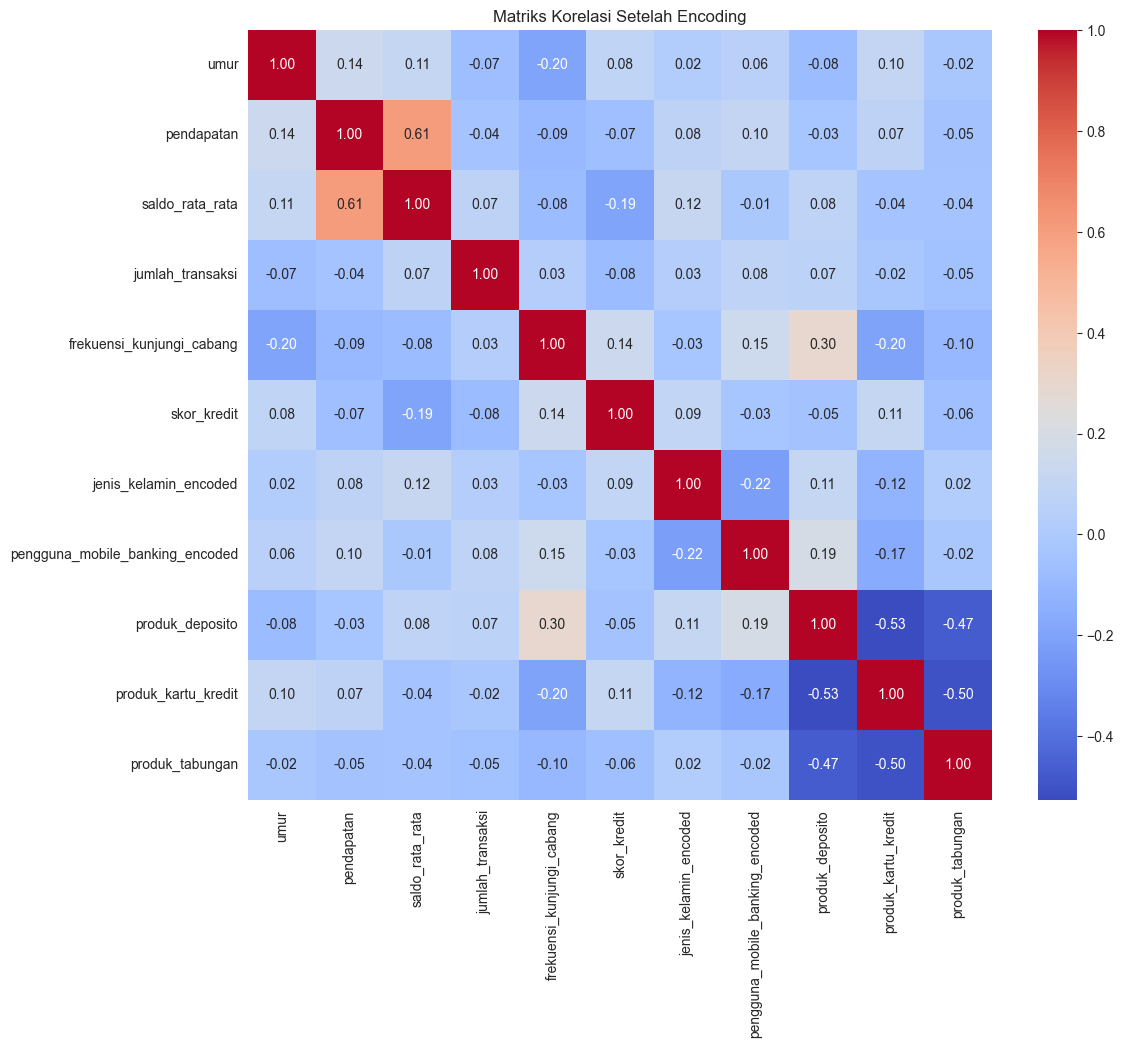


Analisis Korelasi Correlation Matrix Setelah Encoding: 


,umur,pendapatan,saldo_rata_rata,jumlah_transaksi,frekuensi_kunjungi_cabang,skor_kredit,jenis_kelamin_encoded,pengguna_mobile_banking_encoded,produk_deposito,produk_kartu_kredit,produk_tabungan
umur,1.000000,0.135827,0.110737,-0.070723,-0.197003,0.084887,0.019996,0.056203,-0.084865,0.104938,-0.022629
pendapatan,0.135827,1.000000,0.608964,-0.038148,-0.093656,-0.065498,0.075390,0.099744,-0.030728,0.074570,-0.046152
saldo_rata_rata,0.110737,0.608964,1.000000,0.074638,-0.083666,-0.194594,0.117225,-0.009432,0.081153,-0.040517,-0.040457
jumlah_transaksi,-0.070723,-0.038148,0.074638,1.000000,0.030582,-0.082121,0.030983,0.077767,0.067617,-0.015828,-0.052319
frekuensi_kunjungi_cabang,-0.197003,-0.093656,-0.083666,0.030582,1.000000,0.137881,-0.025608,0.147988,0.298989,-0.198999,-0.097448
skor_kredit,0.084887,-0.065498,-0.194594,-0.082121,0.137881,1.000000,0.093756,-0.026970,-0.047894,0.108444,-0.063855
jenis_kelamin_encoded,0.019996,0.075390,0.117225,0.030983,-0.025608,0.093756,1.000000,-0.220397,0.106101,-0.121886,0.018628
pengguna_mobile_banking_encoded,0.056203,0.099744,-0.009432,0.077767,0.147988,-0.026970,-0.220397,1.000000,0.191403,-0.166667,-0.021622
produk_deposito,-0.084865,-0.030728,0.081153,0.067617,0.298989,-0.047894,0.106101,0.191403,1.000000,-0.526358,-0.470409
produk_kartu_kredit,0.104938,0.074570,-0.040517,-0.015828,-0.198999,0.108444,-0.121886,-0.166667,-0.526358,1.000000,-0.502710


In [122]:
# Correlation Analysis Between Numerical Variables (INCLUDING NEWLY ENCODED ONES)
# Now encoded columns are also included in the correlation analysis.
numerical_data_after_encoding = data.select_dtypes(include=['int64']).columns
# Make sure nasabah_id is also excluded if present and is not numeric for correlation
if 'nasabah_id' in numerical_data_after_encoding:
    numerical_data_after_encoding = numerical_data_after_encoding.drop(columns=['nasabah_id'])

correlation_matrix_encoded = data[numerical_data_after_encoding].corr()
plt.figure(figsize=(12, 10))
plt.title('Matriks Korelasi Setelah Encoding')
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

print('\nAnalisis Korelasi Correlation Matrix Setelah Encoding: ')
correlation_matrix_encoded


Analisis Hubungan antara Umur dan Pendapatan:


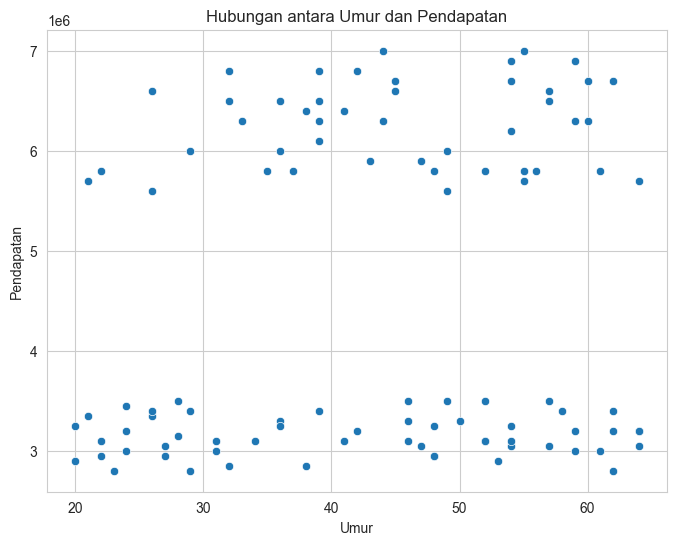


Hubungan antara Jenis Kelamin dan Pendapatan:


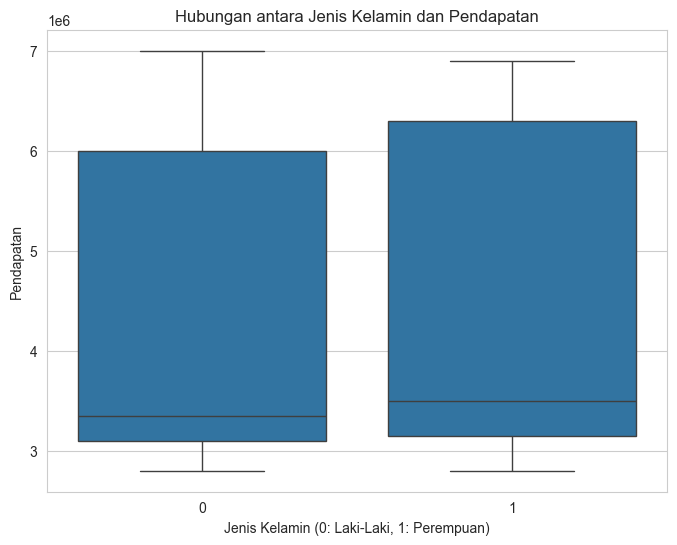


Hubungan antara Pendapatan dan Saldo Rata-Rata:


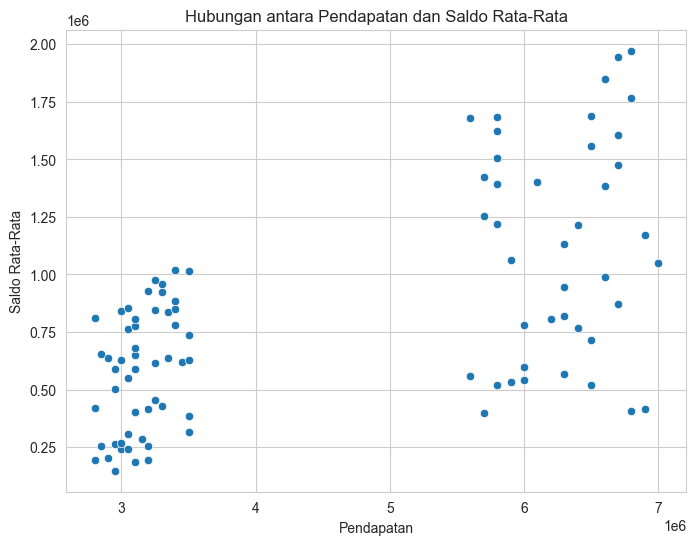


Hubungan antara Skor Kredit dan Pengguna Mobile Banking:


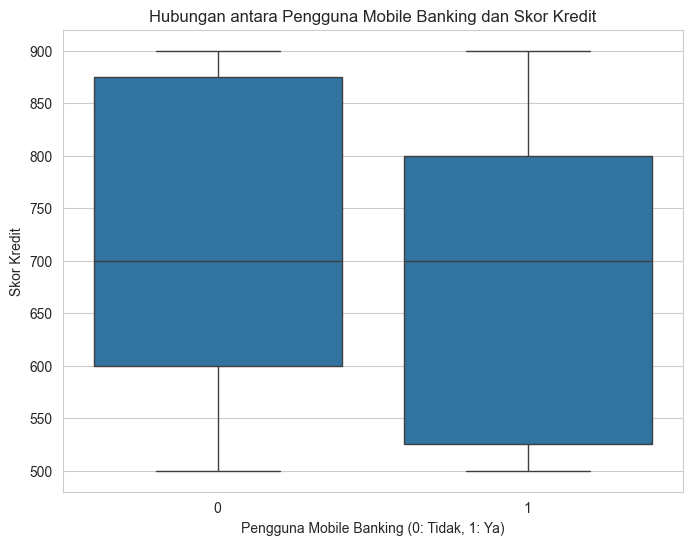

In [123]:
# Numerical vs. Numerical Relationship Analysis

# Analysis of the relationship between e.g. 'umur' and 'pendapatan' (Scatterplot)
cprint('\nAnalisis Hubungan antara Umur dan Pendapatan:', 'blue')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umur', y='pendapatan', data=data)
plt.title('Hubungan antara Umur dan Pendapatan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan')
plt.show()

# Display relationship between 'jenis_kelamin' and 'pendapatan' (Boxplot)
cprint('\nHubungan antara Jenis Kelamin dan Pendapatan:', 'blue')
plt.figure(figsize=(8, 6))
sns.boxplot(x='jenis_kelamin_encoded', y='pendapatan', data=data)
plt.title('Hubungan antara Jenis Kelamin dan Pendapatan')
plt.xlabel('Jenis Kelamin (0: Laki-Laki, 1: Perempuan)')
plt.ylabel('Pendapatan')
plt.show()

# Display relationship between 'pendapatan' and 'saldo_rata_rata' (Scatterplot)
cprint('\nHubungan antara Pendapatan dan Saldo Rata-Rata:', 'blue')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pendapatan', y='saldo_rata_rata', data=data)
plt.title('Hubungan antara Pendapatan dan Saldo Rata-Rata')
plt.xlabel('Pendapatan')
plt.ylabel('Saldo Rata-Rata')
plt.show()

# Display relationship between 'skor_kredit' and 'pengguna_mobile_banking_encoded' (Boxplot)
cprint('\nHubungan antara Skor Kredit dan Pengguna Mobile Banking:', 'blue')
plt.figure(figsize=(8, 6))
sns.boxplot(x='pengguna_mobile_banking_encoded', y='skor_kredit', data=data)
plt.title('Hubungan antara Pengguna Mobile Banking dan Skor Kredit')
plt.xlabel('Pengguna Mobile Banking (0: Tidak, 1: Ya)')
plt.ylabel('Skor Kredit')
plt.show()

